## Exercise 02
## Time Series Analysis
## Interés de la hamburguesa en Colombia

La siguiente serie de tiempo nos permite observar la popularidad de busquedad de la palabra "Hamburguesa" en Colombia, 
estos datos nos muestra el interés que ha tenido este alimento a lo largo del tiempo en las busquedad en Google.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [6]:
import os
print(os.getcwd())

C:\Users\heidy\Downloads


In [8]:
df = pd.read_csv("D:/Heidy/Estudio/Maestría/Intersemestral/Modelos_II/Talleres/Hamb_colombia.csv")
df.head()

,Mes,hamburguesa_Colombia
0,2004-01,0
1,2004-02,0
2,2004-03,0
3,2004-04,0
4,2004-05,43


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Mes                   211 non-null    object
 1   hamburguesa_Colombia  211 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [10]:
df.Mes = pd.to_datetime(df.Mes)
df.set_index('Mes', inplace=True)
df.head()

,hamburguesa_Colombia
Mes,
2004-01-01,0
2004-02-01,0
2004-03-01,0
2004-04-01,0
2004-05-01,43


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2004-01-01 to 2021-07-01
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   hamburguesa_Colombia  211 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


Text(0.5, 0, 'Year')

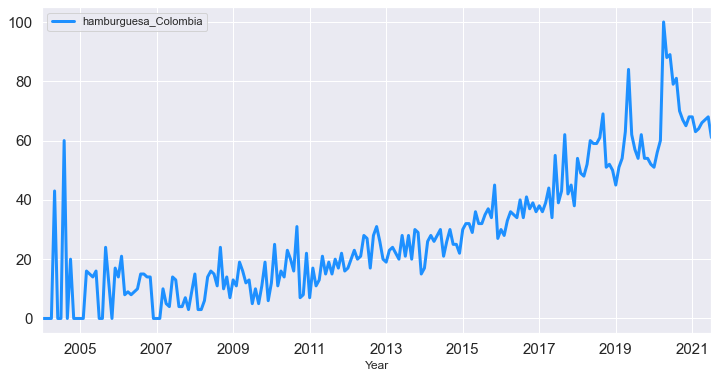

In [27]:
df.plot(figsize=(12,6), linewidth=3, fontsize=15,color="dodgerblue")
plt.xlabel('Year', fontsize=12)

Al observar el comportamiento de la serie se evidencia un crecimiento del interés de la palabra hamburguesa en Colombia en los últimos años, cambiando su distribución y variabilidad a lo largo del tiempo. A partir del 2011 se observa un cambio fuerte de tendencia hacía el aumento.

###  01. Dickey Fuller Test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [31]:
test1 = adfuller(df)
print('ADF Statistic: %f' % test1[0])
print('p-value: %f' % test1[1])
print('Critical Values:')
for key, value in test1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.076181
p-value: 0.995008
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


Gráficamente se puede observar que la serie no es estacionaria, ya que no tiene un comportamiento constante en el tiempo y prensenta gran variabiliad en los últimos años.Adicionalmente, al realizar el test de Dcikey Fuller se puede concluir estadisticamente con p- value de 0.995 que la serie **no es estacionaria**.

### 02.Trends in Time Series Data

Al aislar la estacionalidad con media móvil se observa en la siguiente gráfica la tendencia de la serie. Este gráfico muestra claramente la tendencia de aumento en los últimos años del interés de la hamburguesa en Colombia.

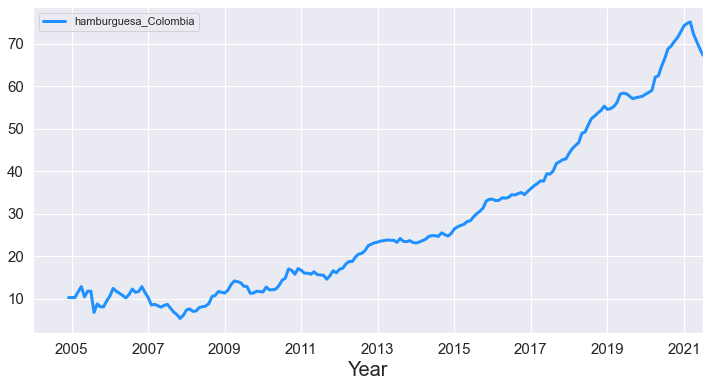

In [28]:
df.rolling(12).mean().plot(figsize=(12,6), linewidth=3, fontsize=15,color="dodgerblue")
plt.xlabel('Year', fontsize=20);

### 0.3 Seasonality in Time Series Data

La siguiente gráfica muestra el componente estacional de la serie al realizar diferenciación con un rezago. Podemos ver algunos picos muy marcados en algunos meses donde se evidencia un mayor interés de hamburguesa.

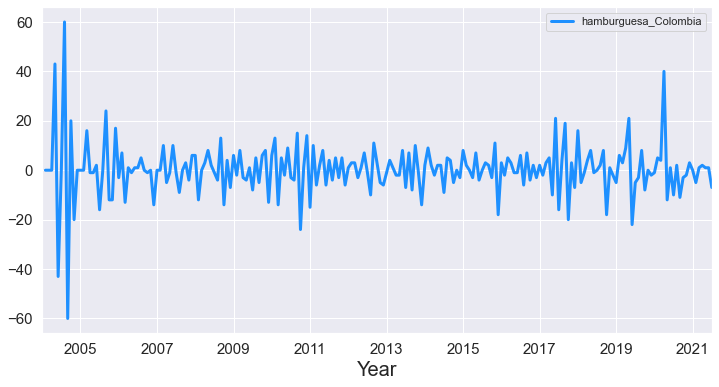

In [30]:
df.diff().plot(figsize=(12,6), linewidth=3, fontsize=15,color="dodgerblue")
plt.xlabel('Year', fontsize=20);

### 04. Dickey Fuller Test - Detrended time series

In [32]:
test2 = adfuller(df.diff().iloc[1:])
print('ADF Statistic: %f' % test2[0])
print('p-value: %f' % test2[1])
print('Critical Values:')
for key, value in test2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.328707
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


Al realizar el test Dickey Fuller a la serie diferenciada con un rezago se puede concluir estadísticamente que ahora la serie **si es estacionaria**.

### 0.5 Autocorrelation

En la siguiente gráfica podemos observar la correlacion de las observaciones de la serie consigo misma en un rango de rezagos. Se evidencia que los valores fuera del intervalo de confianza presenta alta correlación.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

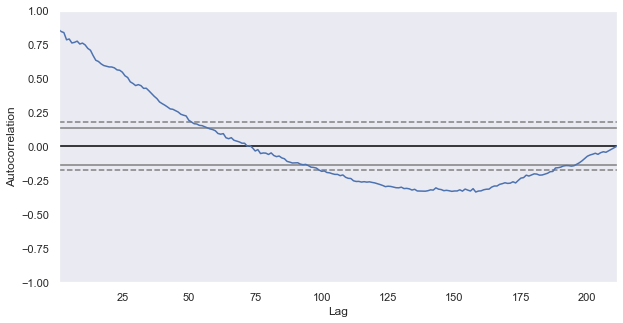

In [38]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(df[['hamburguesa_Colombia']])